# Music and Mental Health : A Data-Driven Exploration

## Group project by : Kehinde Oluwabukola Ogunjobi , Filani Opeyemi Morenike , Kolawole Olatunde Peter

## Dataset gotten from : Kaggle and managed by @catherinerasgaitis

## Aim :The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health.

## NB: I renamed the File as mxmh_survey_results PROJECT INNKEEPER.csv

# Data Cleaning

## . For the data cleaning i used functions like .info() , .describe() in other to understand my data ,
## . I identified null values using .isnull() and replaced it accordingly without bias using some method like replacing with mean mode and specifying the null spaces if significant so as to not take the true meaning from the data ,
## . I also ensured that the data type for each colunm were concurrent across the table.
## . I ensured there were no duplicates in the dataset

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [121]:
df= pd.read_csv("mxmh_survey_results PROJECT INNKEEPER.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [123]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [124]:
null_counts = df.isnull().sum()
print(null_counts)

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [125]:
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

           Timestamp   Age          Primary streaming service  Hours per day  \
0    8/27/2022 19:29  18.0                            Spotify            3.0   
1    8/27/2022 19:57  63.0                            Pandora            1.5   
10   8/27/2022 22:51  18.0                            Spotify            3.0   
12   8/27/2022 23:04   NaN                            Spotify            3.0   
15   8/27/2022 23:19  17.0                            Spotify            2.0   
..               ...   ...                                ...            ...   
688   9/24/2022 0:42  18.0                            Spotify            4.0   
700  10/3/2022 10:00  20.0                      YouTube Music            1.0   
706  10/3/2022 15:38  23.0                            Spotify            1.0   
712   10/4/2022 8:53  23.0  I do not use a streaming service.            3.0   
717  10/5/2022 12:30  23.0                            Spotify            2.0   

    While working Instrumentalist Compo

In [126]:
# Calculate the mean of the "Age" column and round it
mean_age = round(df['Age'].mean())

# Replace missing values with the rounded mean
df['Age'].fillna(mean_age, inplace=True)

# Change the data type of the "Age" column to int
df['Age'] = df['Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           736 non-null    int32  
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [127]:
# Fill null values in specific columns with appropriate replacements
# Calculate the mean of the "Age" column and round it
mean_age = round(df['Age'].mean())

# Replace missing values with the rounded mean
df['Age'].fillna(mean_age, inplace=True)

# Change the data type of the "Age" column to int
df['Age'] = df['Age'].astype(int)

df['Primary streaming service'].fillna('Not Specified', inplace=True)
df['While working'].fillna('Not Specified', inplace=True)
df['BPM'].fillna(0.0, inplace=True)
df['Music effects'].fillna('Unsure', inplace=True)
df['Foreign languages'].fillna('No', inplace=True)
df['Instrumentalist'].fillna('No', inplace=True)
df['Composer'].fillna('No', inplace=True)

# Check the updated information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           736 non-null    int32  
 2   Primary streaming service     736 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 736 non-null    object 
 5   Instrumentalist               736 non-null    object 
 6   Composer                      736 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             736 non-null    object 
 10  BPM                           736 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [128]:
# Get the number of values in the dataset
num_values = df.size

# Print the result
print("The number of values in the dataset is:", num_values)

The number of values in the dataset is: 24288


In [129]:
# Get the number of rows in the dataset
num_rows = df.shape[0]

# Print the result
print("The number of rows in the dataset is:", num_rows)

The number of rows in the dataset is: 736


In [130]:
# Check for duplicate values
has_duplicates = df.duplicated().any()

# Print the result
if has_duplicates:
    print("There are duplicate values in the dataset.")
else:
    print("There are no duplicate values in the dataset.")

There are no duplicate values in the dataset.


In [131]:
# Calculate the age range
min_age = int(df['Age'].min())
max_age = int(df['Age'].max())

# Create the age range string
age_range = str(min_age) + "-" + str(max_age)

# Print the age range
print("The age range of the participants is:", age_range)

The age range of the participants is: 10-89


In [132]:
# Calculate the range of hours per day
min_hours = int(df['Hours per day'].min())
max_hours = int(df['Hours per day'].max())

# Create the hours per day range string
hours_range = str(min_hours) + "-" + str(max_hours)

# Print the range of hours per day for listening to music
print("The range of hours per day for listening to music is:", hours_range)

The range of hours per day for listening to music is: 0-24


In [133]:
# Calculate the mean of hours per day
mean_hours = round(df['Hours per day'].mean())

# Create the mean range string
mean_range = "0-" + str(mean_hours)

# Print the mean range of hours per day for listening to music
print("The mean range of hours per day for listening to music is:", mean_range)

The mean range of hours per day for listening to music is: 0-4


# Data Manipulation

In [134]:
df.groupby('Fav genre')[['Anxiety','Depression','Insomnia','OCD' ]].sum().head(16)

,Anxiety,Depression,Insomnia,OCD
Fav genre,,,,
Classical,259.0,216.0,201.0,126.0
Country,135.0,108.0,68.0,69.0
EDM,203.0,194.0,147.0,111.0
Folk,197.0,152.0,109.0,66.0
Gospel,29.0,16.0,32.0,2.0
Hip hop,217.0,203.0,120.0,95.0
Jazz,118.0,90.0,77.0,56.0
K pop,162.0,115.0,90.0,66.0
Latin,13.0,9.0,10.0,5.0


In [135]:
# Creating the age groups
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '90+']

# Adding a new column 'Age Group' based on the age ranges
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Now you have a new column 'Age Group' that contains the age ranges for each person
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age Group
0,8/27/2022 19:29,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Unsure,I understand.,19-30
1,8/27/2022 19:57,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Unsure,I understand.,61-70
2,8/27/2022 21:28,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,19-30
3,8/27/2022 21:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,61-70
4,8/27/2022 21:54,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,19-30


# Data overview and Insights

In [136]:
# Calculating the percentage use of each streaming service
service_counts = df['Primary streaming service'].value_counts(normalize=True) * 100

# Print the percentage use of each streaming service
print("Percentage use of Primary streaming service:")
print(service_counts)

Percentage use of Primary streaming service:
Primary streaming service
Spotify                              62.228261
YouTube Music                        12.771739
I do not use a streaming service.     9.646739
Apple Music                           6.929348
Other streaming service               6.793478
Pandora                               1.494565
Not Specified                         0.135870
Name: proportion, dtype: float64


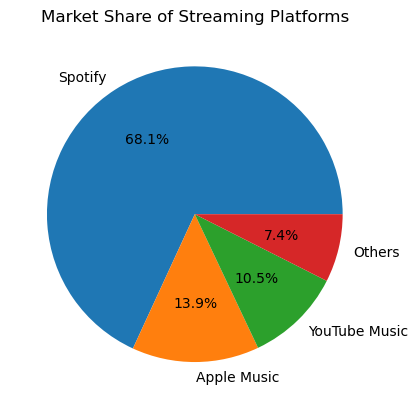

In [137]:
# the streaming platforms and their market shares
platforms = ['Spotify', 'Apple Music', 'YouTube Music', 'Others']
market_shares = [62.2, 12.7, 9.6, 6.8]

# Creating the pie chart
plt.pie(market_shares, labels=platforms, autopct='%1.1f%%')

# Adding  a title
plt.title('Market Share of Streaming Platforms')

# Displaying the chart
plt.show()

In [138]:

total_rows = df.shape[0]

# Group by 'Fav Genre' and count the occurrences
genre_counts = df['Fav genre'].value_counts()

# Calculate the percentage for each genre
genre_percentages = (genre_counts / total_rows) * 100

print(genre_percentages)

# round the percentages to two decimal places, y use the round function:


genre_percentages = genre_percentages.round(2)


# to sort the results in descending order (highest percentage first),  use the sort_values method:


genre_percentages = genre_percentages.sort_values(ascending=False)

Fav genre
Rock                25.543478
Pop                 15.489130
Metal               11.956522
Classical            7.201087
Video game music     5.978261
EDM                  5.027174
R&B                  4.755435
Hip hop              4.755435
Folk                 4.076087
K pop                3.532609
Country              3.396739
Rap                  2.989130
Jazz                 2.717391
Lofi                 1.358696
Gospel               0.815217
Latin                0.407609
Name: count, dtype: float64


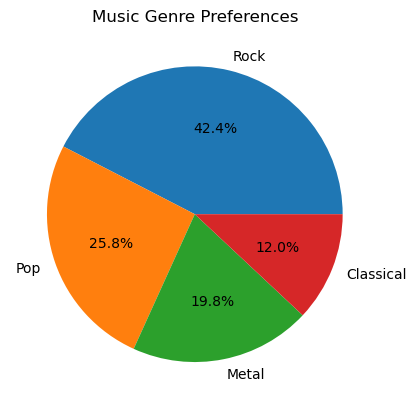

In [139]:
# Define the music genres and their corresponding percentages
music_genres = ['Rock', 'Pop', 'Metal', 'Classical']
genre_percentages = [25.5, 15.5, 11.9, 7.2]

# Create a pie chart
plt.pie(genre_percentages, labels=music_genres, autopct='%1.1f%%')

# Add a title
plt.title('Music Genre Preferences')

# Display the chart
plt.show()

In [140]:
# Calculate the total count for each music effect
music_effects_counts = df['Music effects'].value_counts()

# Calculate the percentage of music effects for each participant
percentage_effects = (music_effects_counts / len(df)) * 100

# Print the percentage of music effects for each participant
print("Percentage of music effects for each participant:")
print(percentage_effects)

Percentage of music effects for each participant:
Music effects
Improve      73.641304
No effect    22.961957
Worsen        2.309783
Unsure        1.086957
Name: count, dtype: float64


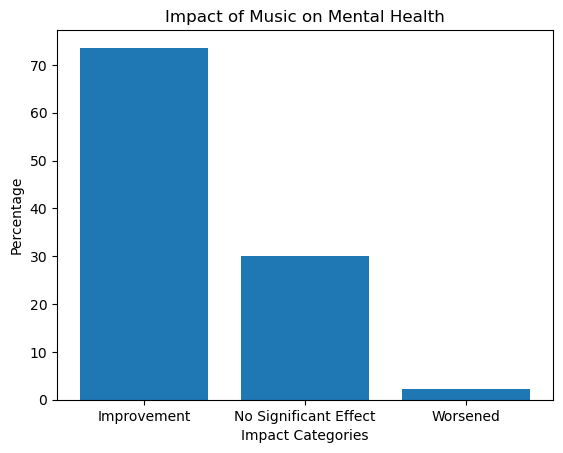

In [141]:
#  the impact categories and their corresponding percentages
impact_categories = ['Improvement', 'No Significant Effect', 'Worsened']
impact_percentages = [73.6, 30, 2.3]

# Create a bar plot
plt.bar(impact_categories, impact_percentages)

# Add labels and title
plt.xlabel('Impact Categories')
plt.ylabel('Percentage')
plt.title('Impact of Music on Mental Health')

# Display the plot
plt.show()

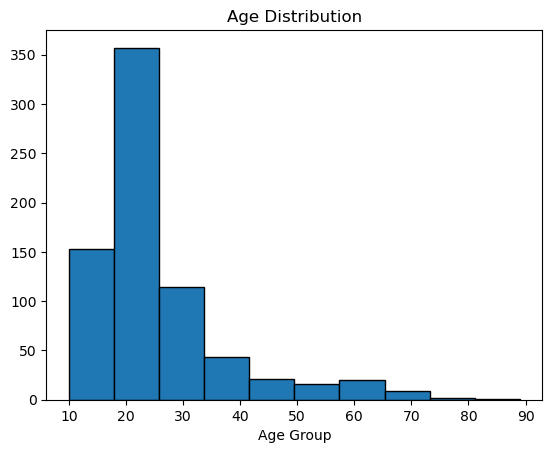

In [142]:
# extract the Age column 
ages=df['Age']
# plot a histogram of the ages
plt.hist(ages,bins=10, edgecolor = 'black')
plt.xlabel('Age Group')
plt.title('Age Distribution')
plt.show()

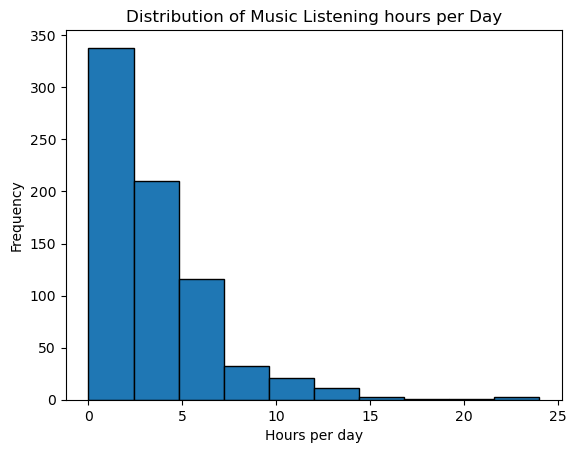

In [143]:
# extracting the necessary data for the chart
hours_per_day = df['Hours per day']
# Plot a histogram chart 
plt.hist(hours_per_day, bins = 10, edgecolor = 'black')
plt.xlabel('Hours per day')
plt.ylabel('Frequency')
plt.title('Distribution of Music Listening hours per Day')
#show the chart 
plt.show()

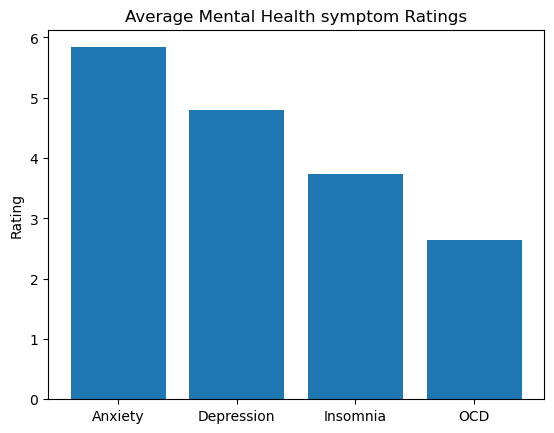

In [144]:
# extract ratings for Anxiety, Depression, Insomnia,and OCD
anxiety_ratings = df['Anxiety']
depression_ratings = df['Depression']
insomnia_ratings = df['Insomnia']
ocd_ratings = df['OCD']
# set the x-axis labels
labels = ['Anxiety','Depression','Insomnia','OCD']
# set the x-axis positions
x = range(len(labels))
#set the bar heights
heights = [anxiety_ratings.mean(),depression_ratings.mean(),insomnia_ratings.mean(),ocd_ratings.mean()]
# plot the bar chart 
plt.bar(x,heights)
#set the x-axis tick label
plt.xticks(x,labels)
# set the y-axis label
plt.ylabel('Rating')
# Setthe title
plt.title('Average Mental Health symptom Ratings')
# Show the plot
plt.show()

C:\Users\oogunjobi\AppData\Local\Temp\ipykernel_16588\1394823055.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  instrumentalists_listening_yes = instrumentalists_data[listening_while_working == 'Yes'].shape[0]
C:\Users\oogunjobi\AppData\Local\Temp\ipykernel_16588\1394823055.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  composers_listening_yes = composers_data[listening_while_working == 'Yes'].shape[0]


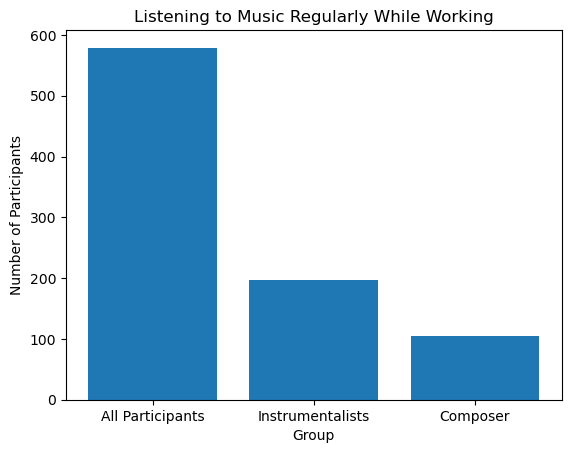

In [145]:
instrumentalist = df['Instrumentalist']
composer = df['Composer']
listening_while_working = df['While working']

# Filter the data for participants who are instrumentalists and composers
instrumentalists_data = df[df['Instrumentalist'] == 'Yes']
composers_data = df[df['Composer'] == 'Yes']

# Count the number of participants who listen to music regularly while working
listening_yes = listening_while_working.value_counts()['Yes']

# Count the number of instrumentalists and composers who listen to music regularly while working
instrumentalists_listening_yes = instrumentalists_data[listening_while_working == 'Yes'].shape[0]
composers_listening_yes = composers_data[listening_while_working == 'Yes'].shape[0]

# Create a bar chart to visualize the data
categories = ['All Participants', 'Instrumentalists', 'Composer']
values = [listening_yes, instrumentalists_listening_yes, composers_listening_yes]

plt.bar(categories, values)
plt.xlabel('Group')
plt.ylabel('Number of Participants')
plt.title('Listening to Music Regularly While Working')

plt.show()

In [146]:
anxiety_df = df[df['Anxiety'] == True]  # Filter the DataFrame to include only those with anxiety

# Get the most common genre among those with anxiety
most_common_genre_anxiety = anxiety_df['Fav genre'].mode()[0]

print(most_common_genre_anxiety)

Metal


In [147]:
depression_df = df[df['Depression'] == True]  # Filter the DataFrame to include only those with depression

# Get the most common genre among those with depression
most_common_genre_depression = depression_df['Fav genre'].mode()[0]

print(most_common_genre_depression)

Rock


In [148]:
insomnia_df = df[df['Insomnia'] == True]  # Filter the DataFrame to include only those with Insomnia

# Get the most common genre among those with Insomnia
most_common_genre_insomnia = depression_df['Fav genre'].mode()[0]

print(most_common_genre_insomnia)

Rock


In [149]:
ocd_df = df[df['OCD'] == True]  # Filter the DataFrame to include only those with OCD

# Get the most common genre among those with OCD
most_common_genre_ocd = ocd_df['Fav genre'].mode()[0]

print(most_common_genre)

Rock


# Statistical Test

### Hypothesis for One way ANOVA testing if fav genre has a significant impact on the following mental health conditions

### NB: Fav genre is the independent variable, mental health conditios such as anxiety etc are dependent variable

### For anxiety
Ho: There is no significant difference in the mean of anxiety across fav_ genres

H1: There is a significant difference in the mean of anxiety across fav_genres


### For OCD
Ho: There is no significant difference in the mean of OCD across fav_ genres

H1: There is a significant difference in the mean of OCD across fav_genres



### For depression
Ho: There is no significant difference in the mean of Depression across fav_ genres

H1: There is a significant difference in the mean of Depression across fav_genres


### For insomnia
Ho: There is no significant difference in the mean of Insomnia across fav_ genres

H1: There is a significant difference in the mean of Insomnia across fav_genres 


### For all mental health condition
Ho: There is no significant difference in the mean of Depression , Insomnia, OCD, Anxiety across fav_ genres

H1: There is a significant difference in the mean of Depression, Insomnia, OCD, Anxiety across fav_genres.

In [103]:
fav_genres = df['Fav genre']
anxiety = df['Anxiety']
# One-way ANOVA for Anxiety
f_value, p_value = stats.f_oneway(*[anxiety[fav_genres == genre] for genre in fav_genres.unique()])
alpha = 0.05
print(f"Anxiety: alpha: {alpha}, P-value: {p_value}")
if p_value < alpha:
    print("Reject null hypothesis: Fav genre has a significant effect on Anxiety")
else:
    print("Fail to reject null hypothesis: Fav genre has no significant effect on Anxiety")

Anxiety: alpha: 0.05, P-value: 0.229021109794951
Fail to reject null hypothesis: Fav genre has no significant effect on Anxiety


In [105]:
fav_genres = df['Fav genre']
depression = df['Depression']
# One-way ANOVA for Depression
f_value, p_value = stats.f_oneway(*[depression[fav_genres == genre] for genre in fav_genres.unique()])
alpha = 0.05
print(f"Depression: alpha: {alpha}, P-value: {p_value}")
if p_value < alpha:
    print("Reject null hypothesis: Fav genre has a significant effect on Depression")
else:
    print("Fail to reject null hypothesis: Fav genre has no significant effect on Depression")


Depression: alpha: 0.05, P-value: 0.019557154986096205
Reject null hypothesis: Fav genre has a significant effect on Depression


In [106]:
fav_genres = df['Fav genre']
insomnia = df['Insomnia']
# One-way ANOVA for Insomnia
f_value, p_value = stats.f_oneway(*[insomnia[fav_genres == genre] for genre in fav_genres.unique()])
alpha = 0.05
print(f"Insomnia: alpha: {alpha}, P-value: {p_value}")
if p_value  < alpha:
    print("Reject null hypothesis: Fav genre has a significant effect on Insomnia")
else:
    print("Fail to reject null hypothesis: Fav genre has no significant effect on Insomnia")


Insomnia: alpha: 0.05, P-value: 0.04807408969222518
Reject null hypothesis: Fav genre has a significant effect on Insomnia


In [52]:
fav_genres = df['Fav genre']
ocd = df['OCD']
# One-way ANOVA for OCD
f_value, p_value = stats.f_oneway(*[ocd[fav_genres == genre] for genre in fav_genres.unique()])
alpha = 0.05
print(f"OCD: alpha: {alpha}, P-value: {p_value}")
if p_value < alpha:
    print("Reject null hypothesis: Fav genre has a significant effect on OCD")
else:
    print("Fail to reject null hypothesis: Fav genre has no significant effect on OCD")

OCD: alpha: 0.05, P-value: 0.8543471661197795
Fail to reject null hypothesis: Fav genre has no significant effect on OCD


In [107]:
fav_genres = df['Fav genre']
anxiety = df['Anxiety']
depression = df['Depression']
insomnia = df['Insomnia']
ocd = df['OCD']
# One-way ANOVA for all mental health variables combined
mental_health = pd.concat([anxiety, depression, insomnia, ocd])
f_value, p_value = stats.f_oneway(*[mental_health[fav_genres == genre] for genre in fav_genres.unique()])
alpha = 0.05
print(f"Mental Health (combined): alpha: {alpha}, P-value: {p_value}")
if p_value < alpha:
    print("Reject null hypothesis: Fav genre has a significant effect on Mental Health (combined)")
else:
    print("Fail to reject null hypothesis: Fav genre has no significant effect on Mental Health (combined)")

Mental Health (combined): alpha: 0.05, P-value: 0.007569201790578019
Reject null hypothesis: Fav genre has a significant effect on Mental Health (combined)
